# 简单均线策略回测

In [123]:
import numpy as np
import pandas as pd
from pylab import plt, mpl

import warnings 
warnings.filterwarnings('ignore')

In [124]:
path = 'https://gitee.com/yanzhang2021/data/raw/master/Bloomberg/EURUSD_daily.csv'
symbol = 'Close'
data = pd.DataFrame(pd.read_csv(path, index_col=0,parse_dates=True).dropna()[symbol])
data


,Close
Date,
1990-01-02,1.2146
1990-01-03,1.2096
1990-01-04,1.2287
1990-01-05,1.2358
1990-01-08,1.2452
...,...
2022-03-09,1.1076
2022-03-10,1.0986
2022-03-11,1.0912


In [125]:
data.describe

<bound method NDFrame.describe of              Close
Date              
1990-01-02  1.2146
1990-01-03  1.2096
1990-01-04  1.2287
1990-01-05  1.2358
1990-01-08  1.2452
...            ...
2022-03-09  1.1076
2022-03-10  1.0986
2022-03-11  1.0912
2022-03-14  1.0940
2022-03-15  1.0949

[8330 rows x 1 columns]>

In [126]:
data=data["2000-01-01":"2005-12-31"]
data

,Close
Date,
2000-01-03,1.0243
2000-01-04,1.0296
2000-01-05,1.0321
2000-01-06,1.0328
2000-01-07,1.0295
...,...
2005-12-26,1.1845
2005-12-27,1.1827
2005-12-28,1.1833


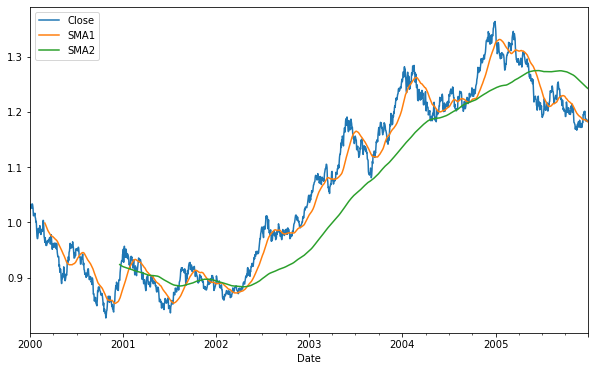

In [127]:
# doing loops without loop code is called vectorized fashion 
n1=21*2
n2=21*12

# rolling(n)滑动窗口


data['SMA1'] = data[symbol].rolling(n1).mean()
data['SMA2'] = data[symbol].rolling(n2).mean()

# %matplotlib widget
data.plot(figsize=(10, 6));

# data

In [128]:
data.dropna(inplace=True)
data

,Close,SMA1,SMA2
Date,,,
2000-12-19,0.8953,0.862126,0.923759
2000-12-20,0.9093,0.863886,0.923303
2000-12-21,0.9166,0.865807,0.922854
2000-12-22,0.9232,0.868093,0.922422
2000-12-25,0.9257,0.870364,0.921997
...,...,...,...
2005-12-26,1.1845,1.183652,1.244073
2005-12-27,1.1827,1.183076,1.243587
2005-12-28,1.1833,1.182698,1.243094


In [129]:
# 创建新列p，短期均线在长期之上时，p=1 否则p=-1
# 注意：p计算出来的依据是SMA1和SMA2，而SMA1和SMA2计算依据是当天的Close，也就是当天收盘价以后计算出的结果

data['p'] = np.where(data['SMA1'] （--填空--） data['SMA2'], 1, -1)#填空data['SMA1']与data['SMA2']的大小关系
data

,Close,SMA1,SMA2,p
Date,,,,
2000-12-19,0.8953,0.862126,0.923759,-1
2000-12-20,0.9093,0.863886,0.923303,-1
2000-12-21,0.9166,0.865807,0.922854,-1
2000-12-22,0.9232,0.868093,0.922422,-1
2000-12-25,0.9257,0.870364,0.921997,-1
...,...,...,...,...
2005-12-26,1.1845,1.183652,1.244073,-1
2005-12-27,1.1827,1.183076,1.243587,-1
2005-12-28,1.1833,1.182698,1.243094,-1


In [130]:
# shift(1) 将p列向下“串”一行，以求回报率;shift(-1)将某列向上串一行
#p列同时表示“明天”做多+1还是做空-1。具体的逻辑是根据“今天”收盘价计算出来的SMA1和SMA2，如果SMA1>SMA2,上穿，则明日开始做多
#这个判断应该是在“今日”的收盘价确定后，也就是收盘以后马上计算得出，而不能在是后盘以前得出。因为及时接近收盘，收盘价仍有可能变化
#只有收盘后，价格才确定不变

data['p'] = data['p'].shift(1)
data

,Close,SMA1,SMA2,p
Date,,,,
2000-12-19,0.8953,0.862126,0.923759,NaN
2000-12-20,0.9093,0.863886,0.923303,-1.0
2000-12-21,0.9166,0.865807,0.922854,-1.0
2000-12-22,0.9232,0.868093,0.922422,-1.0
2000-12-25,0.9257,0.870364,0.921997,-1.0
...,...,...,...,...
2005-12-26,1.1845,1.183652,1.244073,-1.0
2005-12-27,1.1827,1.183076,1.243587,-1.0
2005-12-28,1.1833,1.182698,1.243094,-1.0


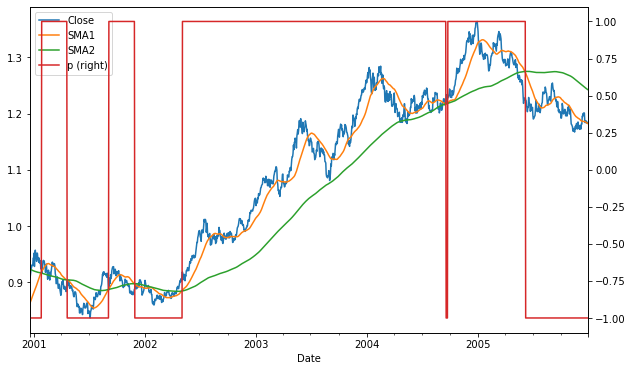

In [131]:
data.dropna(inplace=True)

#secondary_y 表示第二个坐标轴
data.plot(figsize=(10, 6), secondary_y='p');

In [132]:
# 计算“今日”的回报率，r=log(today's close/yesterday's close), data[symbol].shift(1)向下串一行，成为“昨日”的收盘价
data['r'] = np.log(data[symbol] / data[symbol].shift(1))

da--（填空）#填充需要输出的内容，让代码成功运行

,Close,SMA1,SMA2,p,r
Date,,,,,
2000-12-20,0.9093,0.863886,0.923303,-1.0,NaN
2000-12-21,0.9166,0.865807,0.922854,-1.0,0.007996
2000-12-22,0.9232,0.868093,0.922422,-1.0,0.007175
2000-12-25,0.9257,0.870364,0.921997,-1.0,0.002704
2000-12-26,0.9303,0.872531,0.921604,-1.0,0.004957
...,...,...,...,...,...
2005-12-26,1.1845,1.183652,1.244073,-1.0,-0.002024
2005-12-27,1.1827,1.183076,1.243587,-1.0,-0.001521
2005-12-28,1.1833,1.182698,1.243094,-1.0,0.000507


In [133]:
# 比较可行的做法是不是这么频繁的使用dropna(),也可以让此语句只出现在最后一次编写指标之后，节省数据
data.dropna(inplace=True)

#p列表示1或者-1。1即将对应做多，-1对应做空。乘以回报率表示做多的收益率和做空的收益率，表示当日做单后的回报率
#默认条件：开盘时以开盘价买入或者卖出，收盘时以收盘价买入或者卖出，无任何手续费以及其他成本
data['s'] = data['p'] （--填空--） data['r']#填充计算法则字符


data


,Close,SMA1,SMA2,p,r,s
Date,,,,,,
2000-12-21,0.9166,0.865807,0.922854,-1.0,0.007996,-0.007996
2000-12-22,0.9232,0.868093,0.922422,-1.0,0.007175,-0.007175
2000-12-25,0.9257,0.870364,0.921997,-1.0,0.002704,-0.002704
2000-12-26,0.9303,0.872531,0.921604,-1.0,0.004957,-0.004957
2000-12-27,0.9312,0.874676,0.921229,-1.0,0.000967,-0.000967
...,...,...,...,...,...,...
2005-12-26,1.1845,1.183652,1.244073,-1.0,-0.002024,0.002024
2005-12-27,1.1827,1.183076,1.243587,-1.0,-0.001521,0.001521
2005-12-28,1.1833,1.182698,1.243094,-1.0,0.000507,-0.000507


In [134]:
# r列表示当日市场给定的回报率，s列表示当日加入做单方向的回报率，取对数值
data[['r', 's']].sum().apply(np.exp)

r    1.303090
s    1.276328
dtype: float64

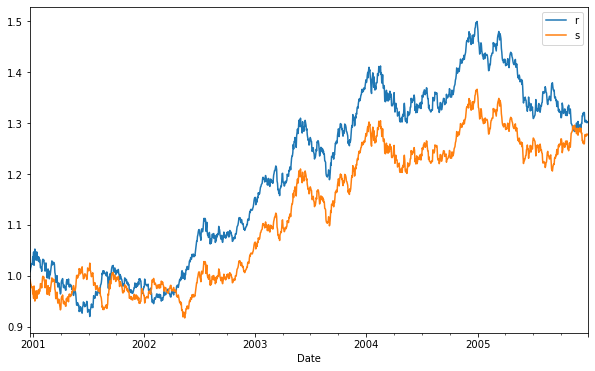

In [135]:
#取r、s两列的累积求和
data[['r', 's']].cumsum().apply(np.exp).plot(figsize=(10, 6));

In [136]:
#data['p'].diff() 表示p列每一个值与前一个值作差，差值不为0，则说明有均线交叉，
# sum求总的交叉次数，+2说明第一次在数据的第一天就开始下单，无论
#当日有没有均线交叉
sum(data['p'].diff() != 0) + 2


11

In [137]:
#设置一个比例手续费，proportional cost，回报率-手续费比率=收入 
pc = 0.005

In [138]:
data['s_'] = np.where(data['p'].diff() != 0,data['s'] - pc, data['s'])


#回测数据第一行处进场，s_表示考量过手续费的做单回报率
data['s_'].iloc[0] -= pc

#回测数据最后一行关单收场
data['s_'].iloc[-1] -= pc


#对dataframe进行切片，列出所有进出场位置
data[['p','r', 's', 's_']][data['p'].diff() != 0]


,p,r,s,s_
Date,,,,
2000-12-21,-1.0,0.007996,-0.007996,-0.017996
2001-01-26,1.0,0.000000,0.000000,-0.005000
2001-04-20,-1.0,0.005223,-0.005223,-0.010223
2001-09-05,1.0,-0.002704,-0.002704,-0.007704
2001-11-29,-1.0,-0.000225,0.000225,-0.004775
2002-05-06,1.0,0.001090,0.001090,-0.003910
2004-09-20,-1.0,-0.000903,0.000903,-0.004097
2004-09-24,1.0,0.000407,0.000407,-0.004593
2005-06-08,-1.0,-0.004160,0.004160,-0.000840


In [139]:
#三列r,s,s_分别表示每天实际回报率，不考量手续费的做单回报率，以及考量手续费的做单回报率
# apply(np.exp)的用意是，由于r已经取对数，取对数是为了计算方便，
# 但是实际使用简单回报率更直观，所以此处使用np.exp将对数回报率转化成简单回报率
data[['r', 's', 's_']].sum().apply(np.exp)

r     1.303090
s     1.276328
s_    1.208026
dtype: float64

In [140]:
data[['r', 's', 's_']].sum().apply(np.exp) - 1

r     0.303090
s     0.276328
s_    0.208026
dtype: float64

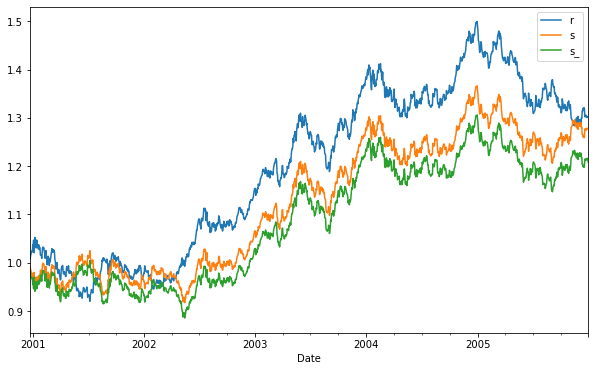

In [141]:
data[['r', 's', 's_']].cumsum().apply(np.exp).plot(figsize=(10, 6));